## **Introduction**

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. 

Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination.


## Problem Statement
Build a Machine Learning Model to predict flight ticket fare for different airline. 

## Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV , RidgeCV, ElasticNet, Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

## Data Cleaning & Preprocessing

In [ ]:
train=pd.read_excel("/content/drive/MyDrive/UDEMY_PROJECTS/Project_1_Flight-Price-Prediction/Data_Train.xlsx")
test=pd.read_excel("/content/drive/MyDrive/UDEMY_PROJECTS/Project_1_Flight-Price-Prediction/Test_set.xlsx")

In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:
# storing number of rows as an a variable for later use
len_train=train.shape[0]

In [ ]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique())

Unique values in Airline 12
Unique values in Date_of_Journey 44
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 128
Unique values in Dep_Time 222
Unique values in Arrival_Time 1343
Unique values in Duration 368
Unique values in Total_Stops 5
Unique values in Additional_Info 10
Unique values in Price 1870


In [ ]:
for i in test.columns:
    print("Unique values in", i, test[i].nunique())

Unique values in Airline 11
Unique values in Date_of_Journey 44
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 100
Unique values in Dep_Time 199
Unique values in Arrival_Time 704
Unique values in Duration 320
Unique values in Total_Stops 5
Unique values in Additional_Info 6


In [ ]:
#coalescing the two columns for data treatment
train=train.append(test)
train=train.reset_index()
train=train.drop('index',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

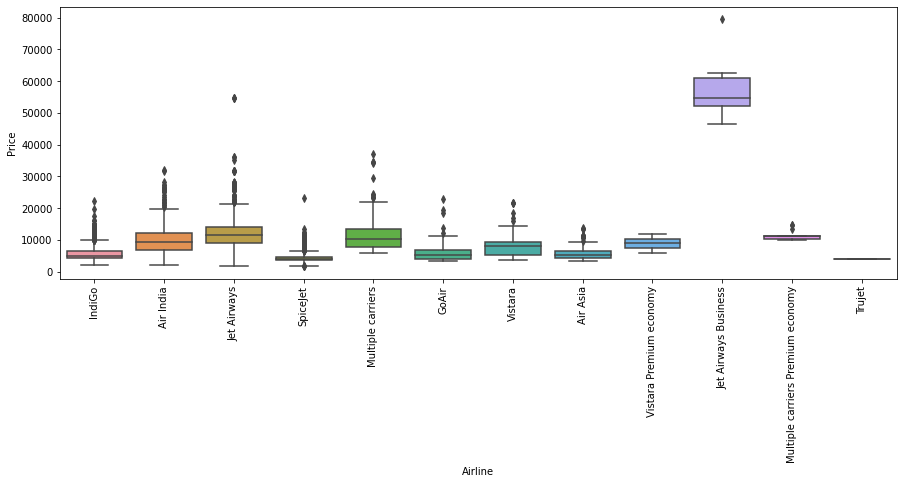

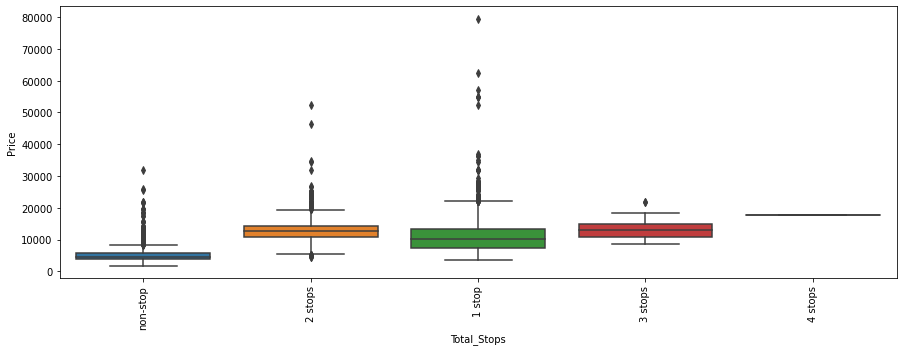

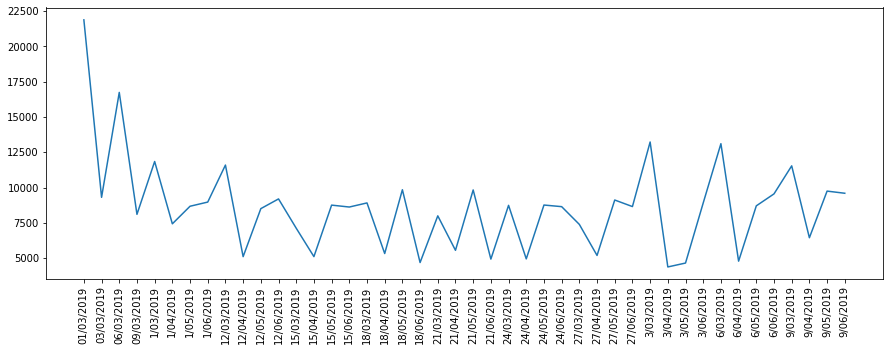

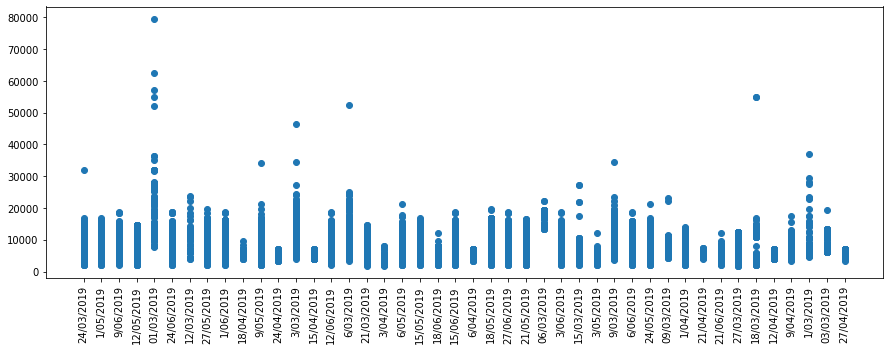

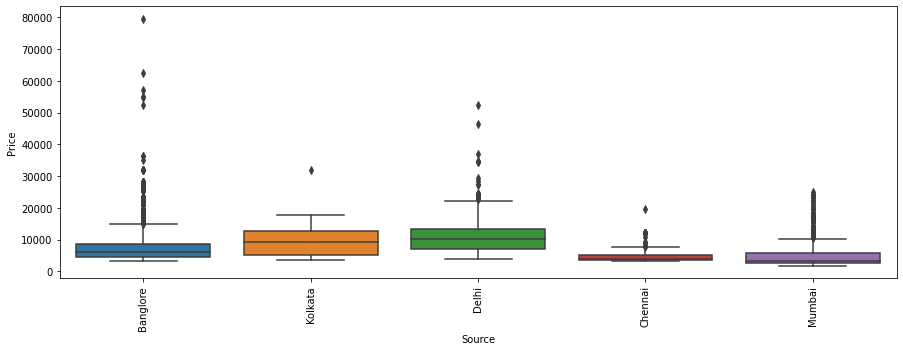

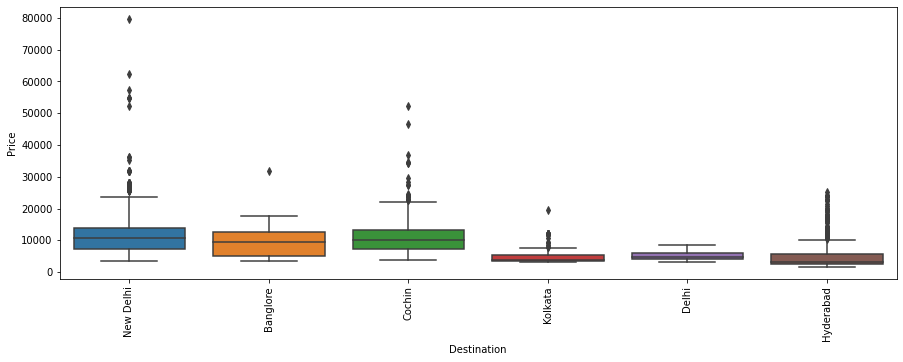

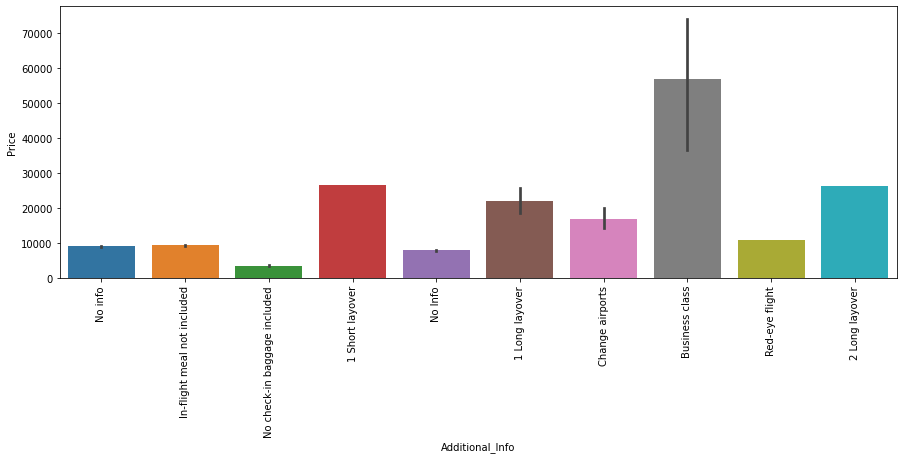

In [ ]:
#Visually understanding the variation of price with different columns
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Airline, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Total_Stops, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.plot(train.sort_values(['Date_of_Journey']).Date_of_Journey.unique(), train.groupby(['Date_of_Journey']).mean())

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.scatter(train.Date_of_Journey, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Source, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Destination, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train.Additional_Info, train.Price )

## Feature Engineering

In [ ]:
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute

train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute

In [ ]:
# Converting Dep_Time from object (string) to time format
train.Dep_Time=pd.to_datetime(train.Dep_Time, format= '%H:%M').dt.time

In [ ]:
# String manipulation to extract only hours and minutes from arrival_time column and dropping the date part, then 
# converting the string to time format as done above
train.Arrival_Time=train.Arrival_Time.str.slice(0,6)
train.Arrival_Time=train.Arrival_Time.str.strip()
train.Arrival_Time=pd.to_datetime(train.Arrival_Time, format = '%H:%M').dt.time

In [ ]:
# Converting date of journey to date format
train.Date_of_Journey=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.date

In [ ]:
# Converting duration from string to integer value in minutes
minute=train['Duration'].str.slice(3,).str.extract('(\d+)')
hour=train['Duration'].str.extract('(\d+)').astype('int')
minute=minute.fillna(0) #filling up minute= 0 where the flight duration only had hours
train['Duration']=minute.astype('int')+hour*60

In [ ]:
# Creating column date of arrival by adding date and time of journey with duration in minutes
train['Date_of_Arrival']=train.apply(lambda r : pd.datetime.combine(r['Date_of_Journey'],r['Dep_Time']),1) + pd.to_timedelta(train.Duration,unit='m')
train['Date_of_Arrival']=train.Date_of_Arrival.dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
# Changing Total Stops from a string value to a categorical value 
train.Total_Stops.value_counts()  

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [ ]:
dic={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops': 4}
train['Total_Stops']=train.Total_Stops.map(dic)
train.Total_Stops=train.Total_Stops.astype('category')

In [ ]:
# Creating a column a categorical column class from the column Airline 
r=train.Airline.str.split(' ',expand=True).get(2)
d={None:'Economy','Premium': 'Premium Economy','economy':'Premium Economy','Business':'Business' }
r=r.map(d)
train['Class']=r
train.Class=train.Class.astype('category')

In [ ]:
# The column Additional info had values No info and No Info stored, editing to bring them to the same string value
train.loc[train.Additional_Info=="No info",'Additional_Info']="No Info"

In [ ]:
# Creating an integer column same_day_travel that highlights whether the flight was arrived the same day, a day from dep, or more..
train['Same_day_travel']=train.Date_of_Arrival-train.Date_of_Journey
train['Same_day_travel']=train.Same_day_travel.astype('category')

In [ ]:
# Converting Airline to category as price varies with airlines ( Category column helps in tree based modelling)
train.Airline=train.Airline.astype('category')

In [ ]:
# Creating 2 columns weekday journey and weekday arrival that highligh what day of the week the flight took off and arrived
# respectively. The idea is that the price will be marginally higher on weekends and this metric can help catch that.
train['weekday_journey']=train['Date_of_Journey'].apply(lambda x: x.weekday())
train['weekday_arrival']=train['Date_of_Arrival'].apply(lambda x: x.weekday())

In [ ]:
# Creating columns for year, month, and day of both departure and arrival as integers to be able to better 
# capture any seasonality due to date
train['Year']=pd.DatetimeIndex(train['Date_of_Journey']).year
train['month_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).month
train['month_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).month
train['day_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).day
train['day_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).day

New-features

In [ ]:
Class = {'IndiGo': 'Economy',
         'GoAir': 'Economy',
         'Vistara': 'Economy',
         'Vistara Premium economy': 'Premium Economy',
         'Air Asia': 'Economy',
         'Trujet': 'Economy',
         'Jet Airways': 'Economy',
         'SpiceJet': 'Economy',
         'Jet Airways Business': 'Business',
         'Air India': 'Economy',
         'Multiple carriers': 'Economy',
         'Multiple carriers Premium economy': 'Premium Economy'}
train['Booking_Class'] = train['Airline'].map(Class)
test['Booking_Class'] = test['Airline'].map(Class)

In [ ]:
market = {'IndiGo': 41.3,
         'GoAir': 8.4,
         'Vistara': 3.3,
         'Vistara Premium economy': 3.3,
         'Air Asia': 3.3,
         'Trujet': 0.1,
         'Jet Airways': 17.8,
         'SpiceJet': 13.3,
         'Jet Airways Business': 17.8,
         'Air India': 13.5,
         'Multiple carriers': 1,
         'Multiple carriers Premium economy': 1}
train['Market_Share'] = train['Airline'].map(market)
test['Market_Share'] = test['Airline'].map(market)

In [ ]:
# Techniques that I tried but didnt help - Number of take offs and landings in a day 
# - Number of takeoffs by city and landings by city in a day
r=train.groupby(['Date_of_Journey']).Date_of_Journey.apply(lambda x: x.count())
train['Number_take-offs']=train.Date_of_Journey.map(r)
r=train.groupby(['Date_of_Arrival']).Date_of_Arrival.apply(lambda x: x.count())
train['Number_landings']=train.Date_of_Arrival.map(r)

In [ ]:
r=train.groupby(['Date_of_Journey','Source'])['Source'].count().reset_index(name='Number_takeoff_source')
train=train.merge(r,how="left", on=["Date_of_Journey","Source"])
r=train.groupby(['Date_of_Arrival','Source'])['Source'].count().reset_index(name='Number_landing_Destination')
train=train.merge(r,how="left", on=["Date_of_Arrival","Source"])

In [ ]:
train[(train.Date_of_Arrival==datetime.date(2019,3,1))][['Source','Number_landing_Destination']]

,Source,Number_landing_Destination
4,Banglore,103
56,Banglore,103
268,Chennai,11
396,Delhi,5
486,Banglore,103
...,...,...
13105,Banglore,103
13121,Banglore,103
13139,Kolkata,14
13298,Banglore,103


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

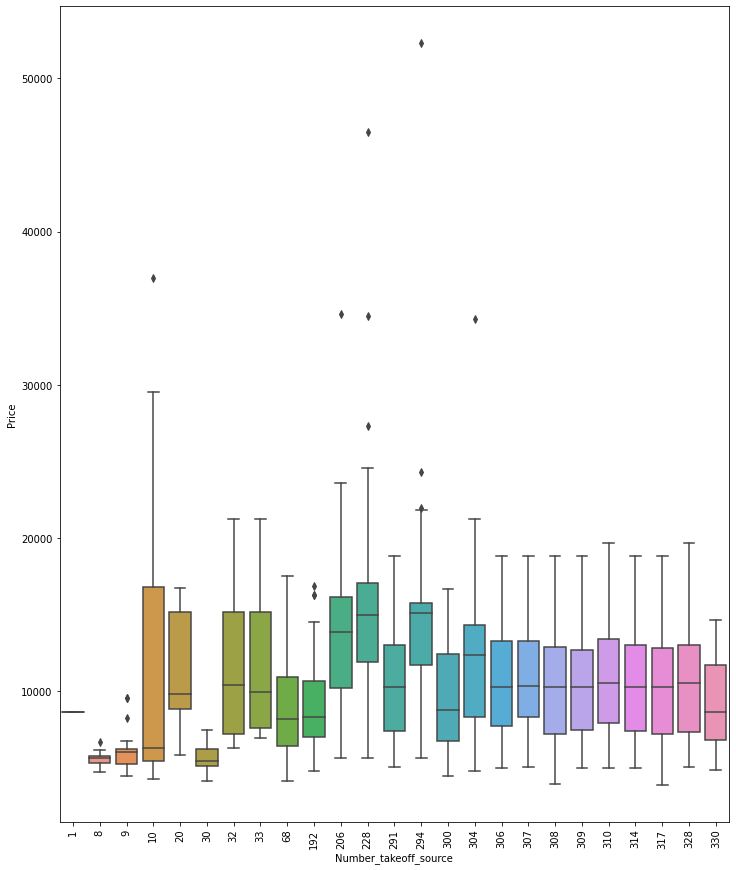

In [ ]:
plt.subplots(figsize=(12,15))
sns.boxplot(train[train.Source=='Delhi'].sort_values(['Date_of_Journey']).Number_takeoff_source,train[train.Source=='Delhi'].sort_values(['Date_of_Journey']).Price)
plt.xticks(rotation=90)

## Data Rescaling (Normalization)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


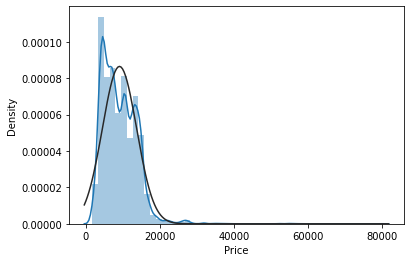

((array([-3.82690953, -3.60266143, -3.4795895 , ...,  3.4795895 ,
          3.60266143,  3.82690953]),
  array([ 1759.,  1759.,  1759., ..., 57209., 62427., 79512.])),
 (4364.062692425855, 9087.064120565383, 0.9460976378917301))

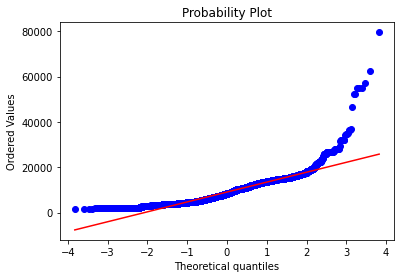

In [ ]:
sns.distplot(train[:len_train].Price, fit=stats.norm)
l=plt.show()
stats.probplot(train[:len_train].Price,plot=plt )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


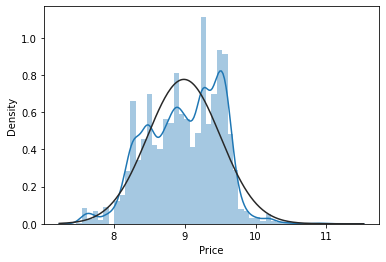

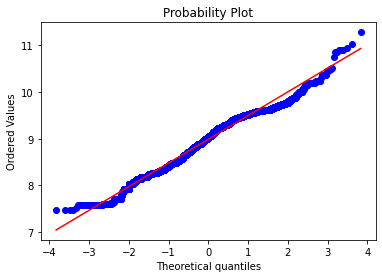

In [ ]:
xt=np.log(train[:len_train].Price)
sns.distplot(xt, fit=stats.norm)
l=plt.show()
stats.probplot(xt,plot=plt )

train.Price=np.log(train.Price)

## Handling Null Values

In [ ]:
##Identifying columns with missing values
train.isnull().sum()

Airline                          0
Date_of_Journey                  0
Source                           0
Destination                      0
Route                            1
Dep_Time                         0
Arrival_Time                     0
Duration                         0
Total_Stops                      1
Additional_Info                  0
Price                         2671
Depart_Time_Hour                 0
Depart_Time_Minutes              0
Arr_Time_Hour                    0
Arr_Time_Minutes                 0
Date_of_Arrival                  0
Class                            0
Same_day_travel                  0
weekday_journey                  0
weekday_arrival                  0
Year                             0
month_of_journey                 0
month_of_Arrival                 0
day_of_Arrival                   0
day_of_journey                   0
Booking_Class                    0
Market_Share                     0
Number_take-offs                 0
Number_landings     

In [ ]:
# Filtering data with missing value and filling up with appropriate values as determined
train.loc[(train.Source=='Delhi') & (train.Destination=='Cochin') & (pd.DatetimeIndex(train['Date_of_Journey']).month==5)& (train.Duration==1420) &(train.Airline=='Air India') ].sort_values(['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey,Booking_Class,Market_Share,Number_take-offs,Number_landings,Number_takeoff_source,Number_landing_Destination
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,1420,NaN,No Info,...,5,5,7,6,Economy,13.5,355,161,32,19
10348,Air India,2019-05-09,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,10,9,Economy,13.5,628,289,304,148
12318,Air India,2019-05-09,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,10,9,Economy,13.5,628,289,304,148
2343,Air India,2019-05-15,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,16,15,Economy,13.5,511,206,192,71
2554,Air India,2019-05-15,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,16,15,Economy,13.5,511,206,192,71
3595,Air India,2019-05-18,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,19,18,Economy,13.5,633,292,310,155
9717,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,19,18,Economy,13.5,633,292,310,155
8135,Air India,2019-05-21,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,...,5,5,22,21,Economy,13.5,615,294,300,156
1616,Air India,2019-05-24,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,...,5,5,25,24,Economy,13.5,357,164,33,16


In [ ]:
train.Route=train.Route.fillna('DEL → MAA → COK')
train.loc[train.Total_Stops.isnull(),'Total_Stops']=1

## Removal of Outliers

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+02, tolerance: 2.818e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


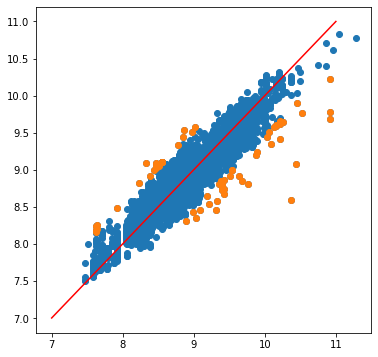

In [ ]:
#Outlier Treatment
from sklearn import linear_model
import statsmodels.api as sm
# ElasticNet = sklearn.linear_model.ElasticNet()

x_out=pd.get_dummies(train[:len_train].drop('Price',axis=1))
y_out=train[:len_train].Price

enet= ElasticNet(max_iter=1000,alpha=0.001,l1_ratio=0)

enet.fit(x_out,y_out)
y_pred=enet.predict(x_out)
resid=y_out-y_pred
z=(resid-resid.mean())/resid.std()
z=np.array(z)
outlier=np.where(abs(z)>abs(z).std()*5)[0]

plt.figure(figsize=(6, 6))
plt.scatter(y_out, y_pred)
plt.scatter(y_out.iloc[outlier], y_pred[outlier])
plt.plot(range(7, 12), range(7, 12), color="red")

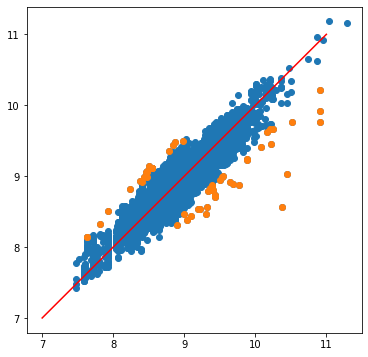

In [ ]:
ridge=Ridge(alpha=1)

ridge.fit(x_out,y_out)
y_pred=ridge.predict(x_out)
resid=y_out-y_pred
z=(resid-resid.mean())/resid.std()
z=np.array(z)
outlier2=np.where(abs(z)>abs(z).std()*5)[0]
len(outlier2)

plt.figure(figsize=(6, 6))
plt.scatter(y_out, y_pred)
plt.scatter(y_out.iloc[outlier2], y_pred[outlier2])
plt.plot(range(7, 12), range(7, 12), color="red")

In [ ]:
outlier_final=[]
for i in outlier:
    for j in outlier2:
        if i==j:
            outlier_final.append(i)
(outlier_final)

[248,
 268,
 396,
 456,
 575,
 703,
 733,
 923,
 1168,
 1416,
 1478,
 1815,
 2002,
 2108,
 2182,
 2528,
 2618,
 2628,
 2650,
 3640,
 4011,
 4012,
 4189,
 4284,
 4453,
 4507,
 4909,
 5082,
 5256,
 5315,
 5388,
 5439,
 5508,
 5549,
 5986,
 6069,
 6213,
 6428,
 6507,
 6756,
 6842,
 6991,
 7392,
 7570,
 7759,
 7834,
 7911,
 7977,
 8034,
 8094,
 8144,
 8399,
 8441,
 9193,
 9243,
 9476,
 9752,
 9974,
 10011,
 10048,
 10052,
 10358,
 10418,
 10503,
 10541,
 10629,
 10649]

In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey,Booking_Class,Market_Share,Number_take-offs,Number_landings,Number_takeoff_source,Number_landing_Destination
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No Info,...,3,3,25,24,Economy,41.3,401,163,123,19
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No Info,...,5,5,1,1,Economy,13.5,339,189,226,96
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2.0,No Info,...,6,6,10,9,Economy,17.8,614,302,291,160
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No Info,...,5,5,12,12,Economy,41.3,327,181,222,86
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No Info,...,3,3,1,1,Economy,41.3,245,151,186,103


## Data Trasformation (BOXCOX Transform)

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train.columns:
    if i!='Price':
        if train[i].dtype in numeric_dtypes: 
            numerics2.append(i)

skew_features = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
print(skews)

high_skew = skew_features[abs(skew_features) > 0.3]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
     if i!='=Price':
        train[i]= boxcox1p(train[i], boxcox_normmax(train[i]+1))

        
skew_features2 = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2


                                skew
Duration                    0.867995
Market_Share                0.763612
Depart_Time_Minutes         0.159379
day_of_journey              0.135127
day_of_Arrival              0.132062
Arr_Time_Minutes            0.111698
Depart_Time_Hour            0.109075
weekday_journey             0.040376
weekday_arrival             0.030020
Year                        0.000000
Number_takeoff_source      -0.348689
Arr_Time_Hour              -0.384548
Number_landing_Destination -0.386354
month_of_Arrival           -0.390640
month_of_journey           -0.390640
Number_landings            -0.413211
Number_take-offs           -0.501536


,skew
Depart_Time_Minutes,0.159379
day_of_journey,0.135127
day_of_Arrival,0.132062
Arr_Time_Minutes,0.111698
Depart_Time_Hour,0.109075
Duration,0.054899
weekday_journey,0.040376
weekday_arrival,0.030020
Year,0.000000
Number_takeoff_source,-0.075456


## Data preperation for Modelling

In [ ]:
# Creating a sparse matrix using pandas get dummies function that helps split string columns into boolean values.
df=pd.get_dummies(train)
# Splitting test and train data
train_df=df[:len_train]
test_df=df[len_train:]

In [ ]:
# Removing Price from independent variable data and keeping only price in the other
x=train_df.drop('Price',axis=1)
y=train_df['Price']

In [ ]:
# Writing a function to evaluate model performance using KFOLD and cross validation
def rmsle_cv(model):
    kfold=KFold(n_splits=2, shuffle=True, random_state=10).get_n_splits(x)
    rmse=np.sqrt(-cross_val_score(model,x,y,cv=kfold, scoring='neg_mean_squared_error'))
    return rmse

In [ ]:
lightgbm=LGBMRegressor(objective='regression',num_leaves=80,
                              learning_rate=0.1, n_estimators=1200,
                              max_bin = 30, bagging_fraction = 0.8,
                              bagging_freq = 9, feature_fraction = 0.129,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 6, random_state=10)

In [ ]:
rmsle_cv(lightgbm).mean(),rmsle_cv(lightgbm).std() # Commented for faster running of complete code

(0.12509199871723525, 0.0058110717627042965)

In [ ]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [ ]:
rmsle_cv(xgb).mean(),rmsle_cv(xgb).std() # Commented for faster running of complete code

[02:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.12374148656110757, 0.0043551868776479236)

In [ ]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=400, max_depth=12
                              ,subsample=0.8,
                              verbose=False,random_state=10)

In [ ]:
rmsle_cv(grb).mean(), rmsle_cv(grb).std() # Commented for faster running of complete code

(0.12709523454681426, 0.005512034960599613)

In [ ]:
svr = Pipeline([('Scaler',RobustScaler()), ('SVR',SVR(C= 10000, epsilon= 0.008, gamma=0.009))])

In [ ]:
rmsle_cv(svr).mean(), rmsle_cv(svr).std() # Commented for faster running of complete code

(0.135107478946642, 0.0026347747750720407)

In [ ]:
krr=KernelRidge(alpha=1, kernel='polynomial', gamma=0.001,degree=3,coef0=5)
rmsle_cv(krr).mean(), rmsle_cv(krr).std() # Commented for faster running of complete code

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


(0.4218104973995328, 0.03760554153392354)

In [ ]:
rf=RandomForestRegressor(n_estimators=100, oob_score = False, n_jobs = -1,random_state =50,
                         max_features = "auto", min_samples_leaf = 2,warm_start=True,criterion='mse',max_depth=50)

In [ ]:
rmsle_cv(rf).mean(), rmsle_cv(rf).std() # Commented for faster running of complete code

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


(0.12767407675274642, 0.007105262093013237)

In [ ]:
# Final ensemble that uses outputs from each model regressor and the original data in the meta regressor XGB
avg=StackingCVRegressor(regressors=(lightgbm,grb,svr,krr,rf),meta_regressor=xgb, use_features_in_secondary=True)
# avg=StackingCVRegressor(regressors=(grb,rf),meta_regressor=xgb, use_features_in_secondary=True)

In [ ]:
# Function to calculate RMSE error of the complete model for reference, similiar to rmsle_cv without KFOLD CV
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
X=np.array(x)
Y=np.array(y)

In [ ]:
# Fitting the model on the train data and predicting the train price values
%%time
avg.fit(X,Y)
y_pred=avg.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual prob

[05:01:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


CPU times: user 3h 45min 46s, sys: 2min 10s, total: 3h 47min 56s
Wall time: 3h 1min 19s


In [ ]:
# RMSE value of the model on training data
rmsle(Y,y_pred)

0.056008376020165174

## Applying Xgboost Model

In [ ]:
# Fitting the model on the train data and predicting the train price values
%%time
avg.fit(X,Y)
y_pred=avg.predict(X)

[13:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 20min 35s, sys: 6.13 s, total: 20min 41s
Wall time: 10min 46s


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime
from sklearn.metrics import mean_squared_error

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
# xgb = XGBRegressor(learning_rate=0.02, n_estimators=2000)
                    # silent=True, nthread=1)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
folds = 3
param_comb = 2

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring=mean_squared_error, n_jobs=4, cv=3, verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan]
  category=UserWarning,


[14:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Time taken: 0 hours 21 minutes and 38.89 seconds.


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([596.00326824, 573.45909524]), 'std_fit_time': array([  0.8579879 , 137.70562804]), 'mean_score_time': array([0.00079807, 0.00044211]), 'std_score_time': array([2.50088349e-05, 2.88693124e-04]), 'param_subsample': masked_array(data=[1.0, 0.6],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 10],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 4],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[2, 5],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[1.0, 1.0],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 1

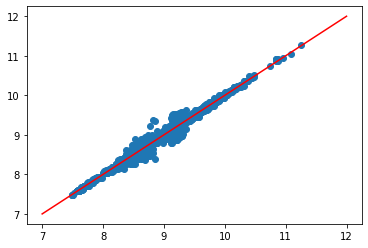

In [ ]:
# Plot of the model prediction with the original price values in the training data set to undestand model fit
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')

In [ ]:
# RMSE value of the model on training data
rmsle(y,y_pred)

0.03848244938916074

## Save the Model 

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)